## This notebook is used to analyze data from the StackOverflow Survey in 2017 and try to answer 6 questions using CRISP-DM process. which are:
* Business Understanding
* Data Understanding
* Data Preparation
* Modeling 
* Evaluation 
* Deployment
## Below are 6 questions that will be answered in this note book
* Question 1: Which are the top 100 countries have the most participants in the survey?
* Question 2: What is the median salary of participants in Stackoverflow survey from the top 19 countries (where each country has more than 100 participants in the survey)?
* Question 3: What are the median salaries of three gender groups (Male, Female and others) among these 19 countries?
* Question 4: What is the median salary of participants group by years of coding at the current job?
* Question 5: What are the median salaries of three gender groups (Male, Female and others) for different years of coding on the current job?
* Question 6: What are the most favorite programming languages that the developers in this survey want to work on?

#### We gather 2 data files from StackOverflow dev survey: survey_results_public.csv' and 'survey_results_schema'.
#### We assess and analyze the survey data to get the business and data undestanding to see if the survey data can provide the answers to our question: 1 to 6.
#### We prepare, clean and tranform the data in order to learn the insights from the survey data
#### We plot the data frame to visualize the results (which are the answers of question 1 and 6) and also use these plots to communicate to the stakeholders

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

survey_df = pd.read_csv('/dbfs/FileStore/tables/survey_results_public.csv')
schema_df = pd.read_csv('/dbfs/FileStore/tables/survey_results_schema.csv')

# get some understanding of survey data
survey_df.head()

Out[446]:

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [0]:
# Check to find out the no of rows and columns of survey_df
survey_df.shape

Out[447]: (51392, 154)

In [0]:
# Explore the data in schema_df
schema_df.head()

Out[448]:

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [0]:
# Got the statistics of the data in each column of survey_results_public's data frame
survey_df.describe()

Out[449]:

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [0]:
# print all of the column names of survey_results_public's data frame
#list(survey_df.columns)
for col in survey_df.columns:
  print(col)

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
JobProfile
ResumePrompted
LearnedHiring
ImportantHiringAlgorithms
ImportantHiringTechExp
ImportantHiringCommunication
ImportantHiringOpenSource
ImportantHiringPMExp
ImportantHiringCompanies
ImportantHiringTitles
ImportantHiringEducation
ImportantHiringRep
ImportantHiringGettingThingsDone
Currency
Overpaid
TabsSpaces
EducationImportant
EducationTypes
SelfTaughtTypes
TimeAfterBootcamp
CousinEducation
WorkStart
HaveWorkedLanguage
WantWorkLanguage
HaveWorkedFramework
WantWorkFramework
HaveWorkedDatabase
WantWorkDatabase
HaveWorkedPlatform
WantWorkPlatform
IDE
AuditoryEnvironment
Methodology
VersionControl
CheckInCode
ShipIt
OtherPeoplesCode
ProjectManagement
EnjoyDebugging
InTheZone
DifficultCommunication
CollaborateRemote
MetricAssess
EquipmentSatisfiedMonitors
EquipmentSatisfiedCPU
EquipmentSatisfiedRAM
EquipmentSatisfiedStorage
EquipmentSatisfiedRW
InfluenceInternet
InfluenceWorkstation
InfluenceHardware
InfluenceServers
InfluenceTechStack
InfluenceDeptTech
InfluenceVizTools
InfluenceDatabase
InfluenceCloud
InfluenceConsultants
InfluenceRecruitment
InfluenceCommunication
StackOverflowDescribes
StackOverflowSatisfaction
StackOverflowDevices
StackOverflowFoundAnswer
StackOverflowCopiedCode
StackOverflowJobListing
StackOverflowCompanyPage
StackOverflowJobSearch
StackOverflowNewQuestion
StackOverflowAnswer
StackOverflowMetaChat
StackOverflowAdsRelevant
StackOverflowAdsDistracting
StackOverflowModeration
StackOverflowCommunity
StackOverflowHelpful
StackOverflowBetter
StackOverflowWhatDo
StackOverflowMakeMoney
Gender
HighestEducationParents
Race
SurveyLong
QuestionsInteresting
QuestionsConfusing
InterestedAnswers
Salary
ExpectedSalary

In [0]:
# Get the descrption of the corresponding questions in the survey
def get_description(column_name, schema=schema_df):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema_df[schema_df['Column'] == column_name]['Question'])[0]
    return desc

In [0]:
# What is the question asked related to Salary
get_description('Salary') 

Out[452]: 'What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?'

In [0]:
# What is the question asked related to Country
get_description('Country') 

Out[453]: 'In which country do you currently live?'

In [0]:
# What is the question asked related to Country
get_description('Gender') 

Out[454]: 'Which of the following do you currently identify as?'

In [0]:
# Function to separate strings in a column content
def split_strings_in_column(df, col, delimiter=';'):
    '''
    INPUT:
        - df : a input dataframe
        - col - string : a column for splitting
        - delimiter - string : a character that seperates the strings in a column content
    OUTPUT:
        - new_df : a new dataframe 
    '''
    new_df = pd.DataFrame(df[col].dropna().str.split(delimiter).tolist()).stack()
    new_df.reset_index(drop=True)
    #new_df.reset_index(drop=False)
    return new_df

In [0]:
def regroup_gender_values(df, col):
    '''
    
    Return new dataframe with "gender" column has 3 values: "Male", "Female" or "Others"
    
    Parameters:
    df: an input dataframe
    col: desired column to consolidate into 3 values
    
    Returns:
    new_df: the new datafame where "gender" column has 3 values: "Male", "Female" or "Others"
    
    '''
    new_df = df.copy()
    new_df.loc[(new_df[col] != 'Male') & (new_df[col] != 'Female') , col] = "Others"   
    return new_df

In [0]:
def consolidate_country_values(df, col):
    '''
    
    Return the data frame for any "country" name having a word 'US', 'British', 'French' by 'US', 'United Kingdom', 'France' 
    For ex: 'Virgin Islands (USA)' replace by 'US', 'Virgin Islands (British)' replaced by 'British', 'Reunion (French)'
    
    Parameters:
    df: an input dataframe
    col: desired column to consolidate into 3 values
    
    Returns:
    new_df: the new datafame where "gender" column has 3 values: "Male", "Female" or "Others"
    
    '''
   
    country_pat = ['US', 'British', 'French']
    pat = r'({})'.format('|'.join(country_pat))
    df[col] = df[col].str.extract(pat, expand=False).fillna(df[col])

    # Since "US" and "United States" is the same country consolidate them into one name: "United States", 'French' to France' and 'British' to 'United Kingdom'
    df.loc[df[col] == "US", "Country"] = "United States"
    df.loc[df[col] == "French", "Country"] = "France"
    df.loc[df[col] == "British", "Country"] = "United Kingdom"
    return df

In [0]:
# Draw the bar plot of the x_col vs y_col
def plot_bar_graph(df, x_col, y_col, title, x_fig, y_fig, fontsize, t_color, g_color, vert, rot):
    """ 
    Description: 
            Plot y_col versus x_col as bar graph.
    
    INPUT: 
            df (object): 2-D Dataframe
            x_data (string): Data Column for x-axis
            y_data (string): Data Column for y-axis
            title: the text of the title
            fontsize: fontsize of the title
            t_color: color of the title
            g_color: color of the graph
            vert: True (display the bar in y-axis), False (display the bar in x-axis)
            rot: angle to display the text of the bar
  
    OUTPUT: 
            Axes Instance
    """
    plt.figure(figsize=(x_fig, y_fig))
    plt.title(title, fontsize=fontsize, color=t_color)
    if vert == True:
      #sns.barplot(data=df, x = y_col, y = x.col)
      ax = df.plot.barh(x=x_col, y=y_col, color=g_color, rot=0)
    else:
      #sns.barplot(data=df, x = x_col, y = y_col)
      ax = df.plot(kind='bar', x=x_col, y=y_col, color=g_color, rot=rot)
    return ax

In [0]:
# Analyze the survey_df to find out which column does not have missing data
no_nulls = set(survey_df.columns[survey_df.isnull().mean()==0])
no_nulls

Out[459]: {'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

### From the above analysis, "Country" does not have missing data
### We can start to analyze which country has the most participants in the survey

In [0]:
# Find all of the countries which the participants in this survey come from
survey_df['Country'].unique()

Out[460]: array(['United States', 'United Kingdom', 'Switzerland', 'New Zealand',
 'Poland', 'Colombia', 'France', 'Canada', 'Germany', 'Greece',
 'Brazil', 'Israel', 'Italy', 'Belgium', 'India', 'Chile',
 'Croatia', 'Argentina', 'Netherlands', 'Denmark', 'Ukraine',
 'Sri Lanka', 'Malaysia', 'Finland', 'Turkey', 'Spain', 'Austria',
 'Mexico', 'Russian Federation', 'Bulgaria', 'Uruguay', 'Estonia',
 'Iran', 'Bangladesh', 'Sweden', 'Lithuania', 'Paraguay', 'Romania',
 'Costa Rica', 'Serbia', 'Slovenia', 'United Arab Emirates',
 'Tunisia', 'Kenya', 'El Salvador', 'Norway', 'Dominican Republic',
 'Belarus', 'Portugal', 'Czech Republic', 'Albania',
 'I prefer not to say', 'South Africa', 'Uzbekistan', 'Moldavia',
 'Ireland', 'Nepal', 'Pakistan', 'Slovak Republic', 'Hungary',
 'Egypt', 'Australia', 'Japan', 'South Korea', 'Rwanda',
 'Luxembourg', 'Kazakhstan', 'Bolivia', 'Vietnam', 'Somalia',
 'Saudi Arabia', 'Ethiopia', 'Macedonia', 'Bosnia-Herzegovina',
 'Algeria', 'Nicaragua', 'Cuba', 'Indonesia',
 'Netherlands Antilles', 'Jamaica', 'Nigeria', 'Ecuador', 'Peru',
 'Malta', 'Uganda', 'Morocco', 'Guatemala', 'Jordan', 'Cyprus',
 'Georgia', 'Armenia', 'Virgin Islands (USA)', 'Lebanon', 'China',
 'Bermuda', 'Latvia', 'Singapore', 'Thailand', 'American Samoa',
 'Puerto Rico', 'Philippines', 'Hong Kong', 'Taiwan', 'Cape Verde',
 'Trinidad and Tobago', 'Mongolia', 'Myanmar', 'North Korea',
 'Afghanistan', 'Cambodia', 'Liechtenstein', 'Botswana',
 'Madagascar', 'Mauritius', 'Iraq', 'Ghana', 'Aland Islands',
 'Zambia', 'Iceland', 'Zimbabwe', 'Azerbaidjan', 'Kuwait',
 'Venezuela', 'S. Georgia & S. Sandwich Isls.', 'Panama', 'Andorra',
 'Cayman Islands', 'Bahamas', 'Honduras', 'Sudan', 'Syria',
 'Gibraltar', 'Virgin Islands (British)', 'Cameroon', 'Tanzania',
 'Mozambique', 'Qatar', 'Libya', 'Reunion (French)',
 'Vatican City State', 'Oman', 'Angola', 'Montenegro', 'Haiti',
 'New Caledonia (French)', 'Bahrain', 'Bouvet Island', 'Togo',
 'Namibia', 'Guyana', 'Lesotho', 'Antarctica', 'Burkina Faso',
 'Anguilla', 'Fiji', 'Bhutan', 'Malawi', 'Laos', 'Gabon', 'Senegal',
 'Kyrgyzstan', 'Tadjikistan', 'Brunei Darussalam', 'Zaire',
 "Ivory Coast (Cote D'Ivoire)", 'Saint Lucia', 'Monaco',
 'U.S. Minor Outlying Islands', 'Polynesia (French)',
 'French Guyana', 'Pitcairn Island', 'Seychelles', 'Guinea',
 'Aruba', 'Belize', 'Benin', 'Swaziland', 'Barbados', 'Eritrea',
 'Niger', 'Suriname', 'Guam', 'Antigua and Barbuda', 'Djibouti',
 'Mali', 'British Indian Ocean Territory',
 'Northern Mariana Islands', 'Saint Vincent & Grenadines',
 'Martinique (French)', 'Burundi', 'Cook Islands', 'Yemen',
 'Turkmenistan', 'Macau', 'Chad', 'Falkland Islands', 'Montserrat',
 'Christmas Island', 'Heard and McDonald Islands', 'Comoros',
 'Saint Helena'], dtype=object)

## Question 1: Which are the top 100 countries have the most participants in the survey

#### From the above analysis, we saw some country names: 'Virgin Islands (USA)' are belong to "US", 'Virgin Islands (British)' is belong to 'United Kingdom' and 'Reunion (French)' to 'France'
#### We consolidate them into 'US', 'United Kingdom' and 'France'

Out[461]:

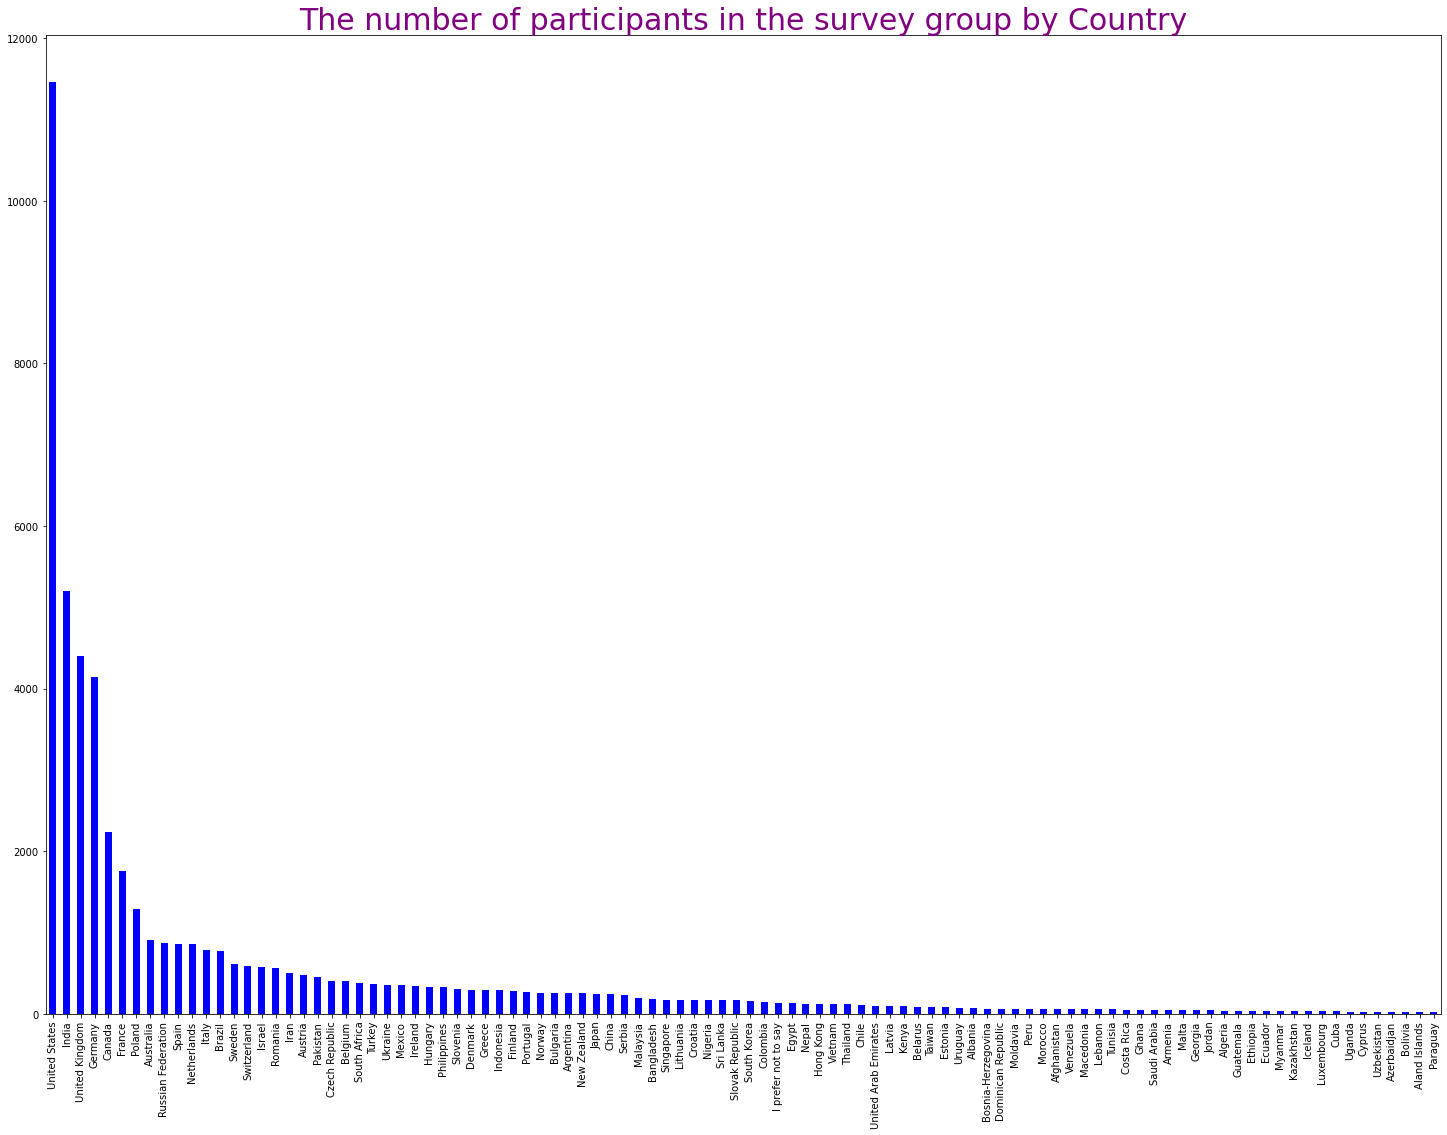

<AxesSubplot:title={'center':'The number of participants in the survey group by Country'}>

In [0]:
survey_df = consolidate_country_values(survey_df, "Country")
# Get the participane's count of "each country"
country_value_counts = survey_df["Country"].value_counts()
country_value_counts.head(20)

plot_bar_graph(country_value_counts[:100], 'index', 'Country', "The number of participants in the survey group by Country", 25, 18, 30, 'purple', 'blue', vert=False, rot=90)

### From the above plot, US has the most participants, next is India, United Kingdom, Germany, Canda, France, etc

## Question 2: What is the median salary of participants in Stackoverflow survey from the top 19 countries (where each country has more than 100 participants in the survey)
### Note: Only 19 countries has more than 100 participants in the survey

In [0]:
#Find out the salary distribution of the participants in this survey
survey_df.describe()

Out[462]:

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


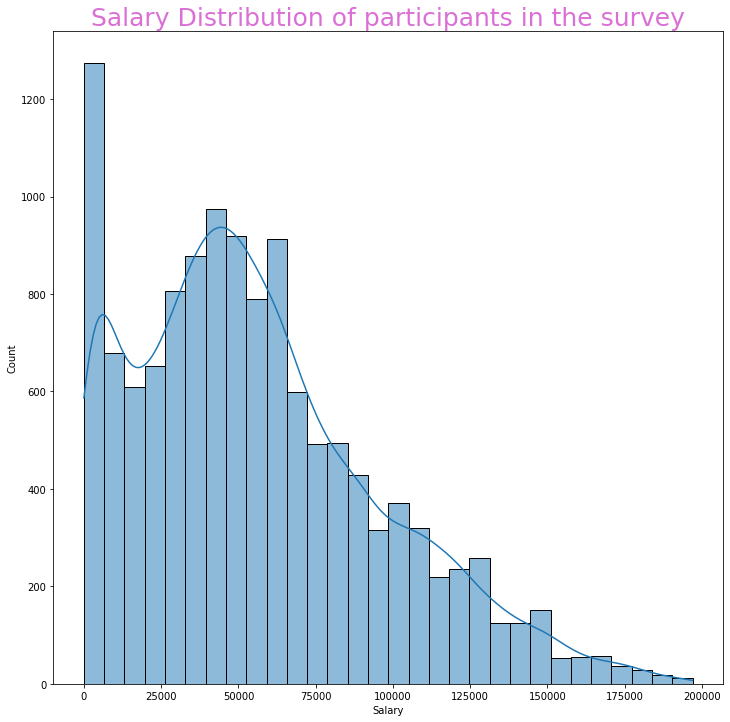

In [0]:
# Get a histogram of the Salary distrubution, we should see the average salary is around 56,000 
plt.figure(figsize=(12, 12))
plt.title("Salary Distribution of participants in the survey", fontsize=25, color="orchid")

sns.histplot(x = survey_df.Salary, bins = 30, kde = True);

In [0]:
# Drop any row where the Salary is null
no_null_sal = survey_df.dropna(subset=['Salary']).copy()

Out[465]:

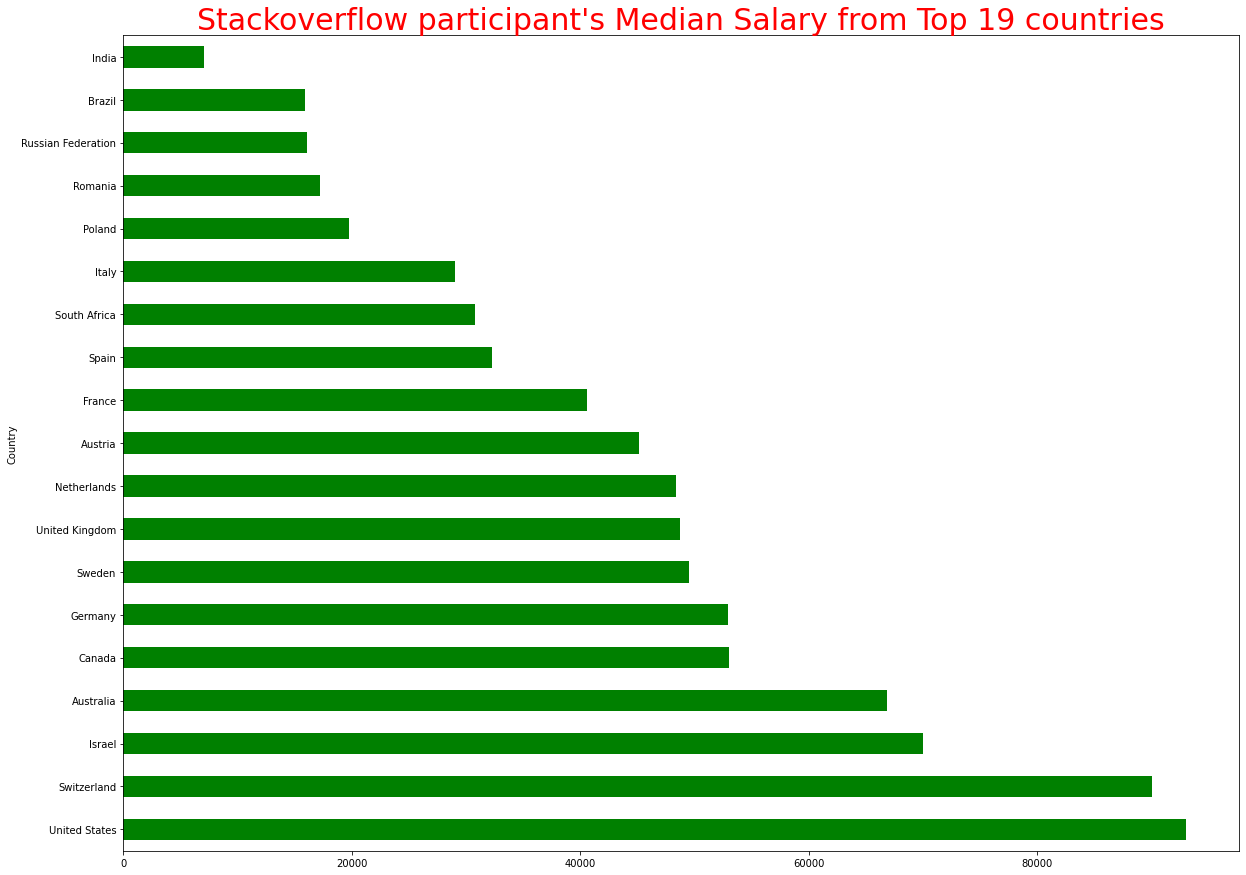

<AxesSubplot:title={'center':"Stackoverflow participant's Median Salary from Top 19 countries"}, ylabel='Country'>

In [0]:
# Get the participane's count of "each country"
value_counts = no_null_sal["Country"].value_counts()
#print(value_counts/survey_df.shape[0])

# Select the values where the Country having less than 100 participants to be removed to eliminate outliners
to_remove = value_counts[value_counts <= 100].index

# Keep rows where the "Country" column is not in to_remove list
sub_df = no_null_sal[~no_null_sal.Country.isin(to_remove)]

# Plot the median Salary of top 60 countries having more 100 survey participant 
c_df = sub_df.groupby('Country')['Salary'].median().sort_values(ascending = False)
c_df.head(19)
plot_bar_graph(c_df, 'Country', 'Salary', "Stackoverflow participant's Median Salary from Top 19 countries", 20, 15, 30, 'red', 'green', vert=True, rot=0)

### From the above plot, we can see US has the top median salary compared with other countries. India has the lowest median salary among these 19 countries, which is 7047.42
### The median salary of the top 10 countries are:
| Country           |   Median Salary   |
|:------------------|:-----------------:|
| United States     |   93000.00        |
| Switzerland       |   90000.00        |
| Israel            |   70000.00        |
| Australia         |   66856.06        |
| Canada            |   53030.30        |
| Germany           |   52903.23        |
| Sweden            |   49547.51        |
| United Kingdom    |   48750.00        |
| Netherlands       |   48387.10        |
| Austria           |   45161.29        |

## Question 3: What are the median salaries of three gender groups (Male, Female and others) among these 19 countries

In [0]:
# Find out how many gender groups in the survey data
gender_value_counts = sub_df["Gender"].value_counts()
gender_value_counts.head(100)

Out[466]: Male 8849
Female 710
Male; Other 39
Gender non-conforming 38
Other 37
Female; Transgender 18
Male; Gender non-conforming 17
Female; Gender non-conforming 12
Transgender 8
Male; Female; Transgender; Gender non-conforming; Other 5
Male; Female 5
Transgender; Gender non-conforming 4
Male; Transgender 4
Female; Transgender; Gender non-conforming 3
Female; Transgender; Other 1
Male; Transgender; Other 1
Male; Gender non-conforming; Other 1
Male; Female; Other 1
Name: Gender, dtype: int64

In [0]:
# Before deleting rows having null value in 'Gender' column, there are 10690 rows
sub_df.shape

Out[467]: (10690, 154)

In [0]:
# Deleting rows having null value in 'Gender' column, there are 9753 rows
no_null_gender = sub_df.dropna(subset=['Gender'])
no_null_gender.shape

Out[468]: (9753, 154)

In [0]:
# Consolidate into 3 gender groups (Male, Female and others)
gender_df = regroup_gender_values(no_null_gender, "Gender")

gender_value_counts = gender_df["Gender"].value_counts()
gender_value_counts
#gender_df.shape

Out[469]: Male 8849
Female 710
Others 194
Name: Gender, dtype: int64

Out[470]:

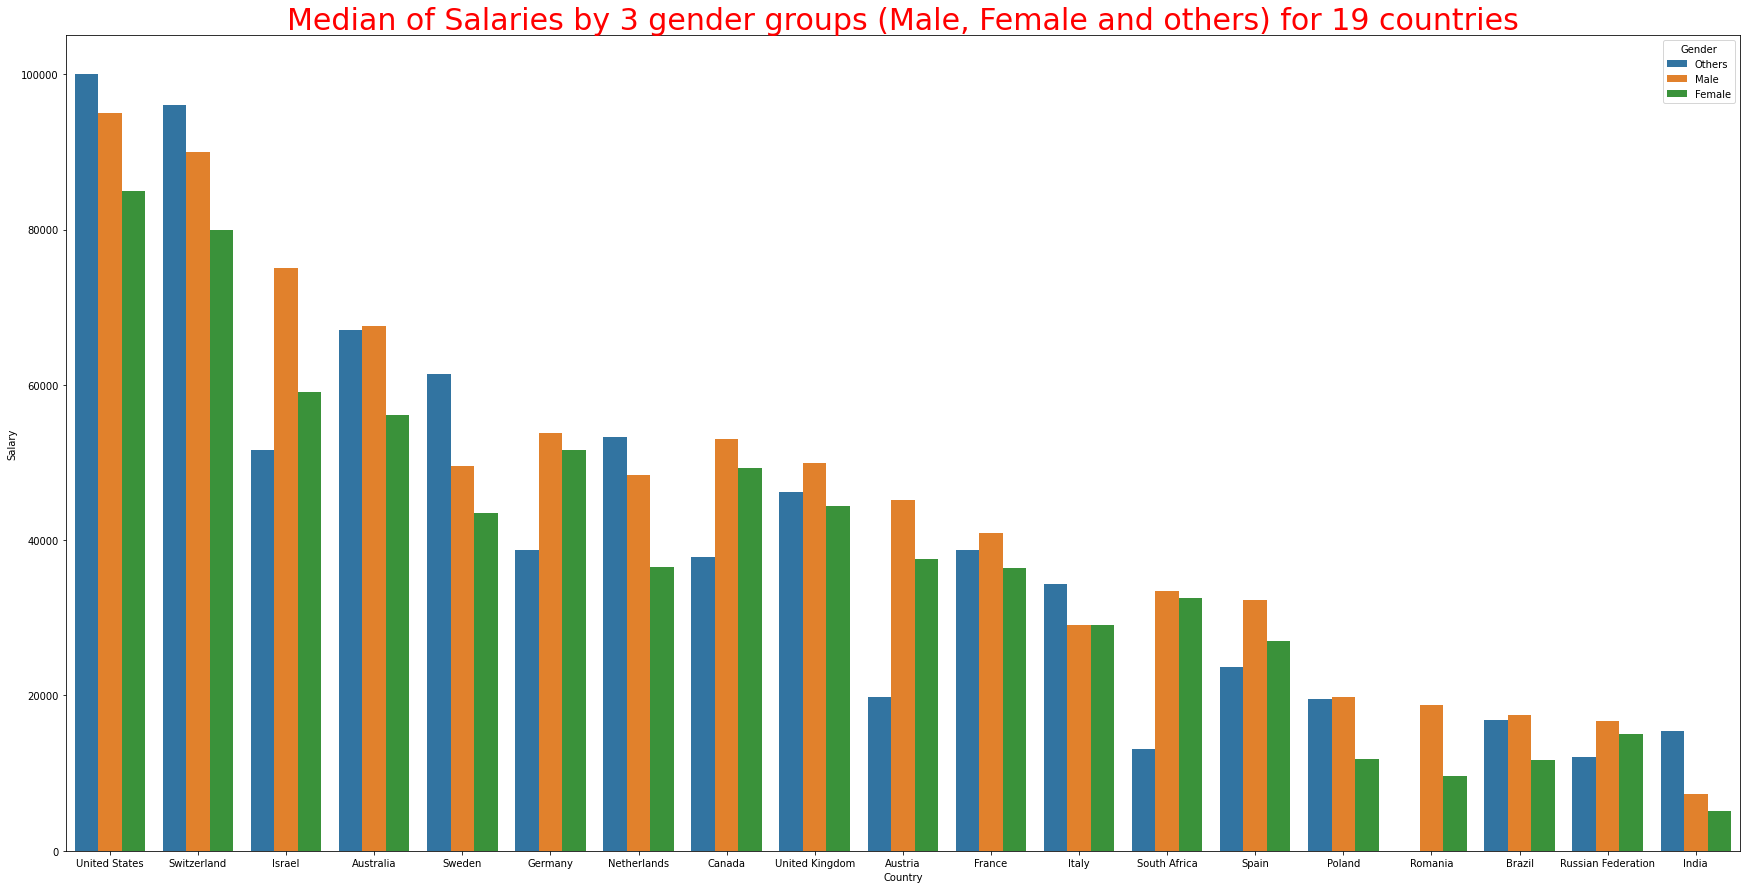

Text(0.5, 1.0, 'Median of Salaries by 3 gender groups (Male, Female and others) for 19 countries')

In [0]:
# Plot the median salary of three gender groups (Male, Female and others) for 19 countries
salary_gender_plot = gender_df.groupby(['Country','Gender'])['Salary'].median().sort_values(ascending = False).reset_index()
salary_gender_plot
plt.figure(figsize=(30, 15))
sns.barplot(x = 'Country', y = 'Salary', hue = 'Gender', data = salary_gender_plot)
plt.title('Median of Salaries by 3 gender groups (Male, Female and others) for 19 countries', fontsize=30, color='red')

## Question 4: What is the median salary of participants group by years of coding at the current job

Out[471]:

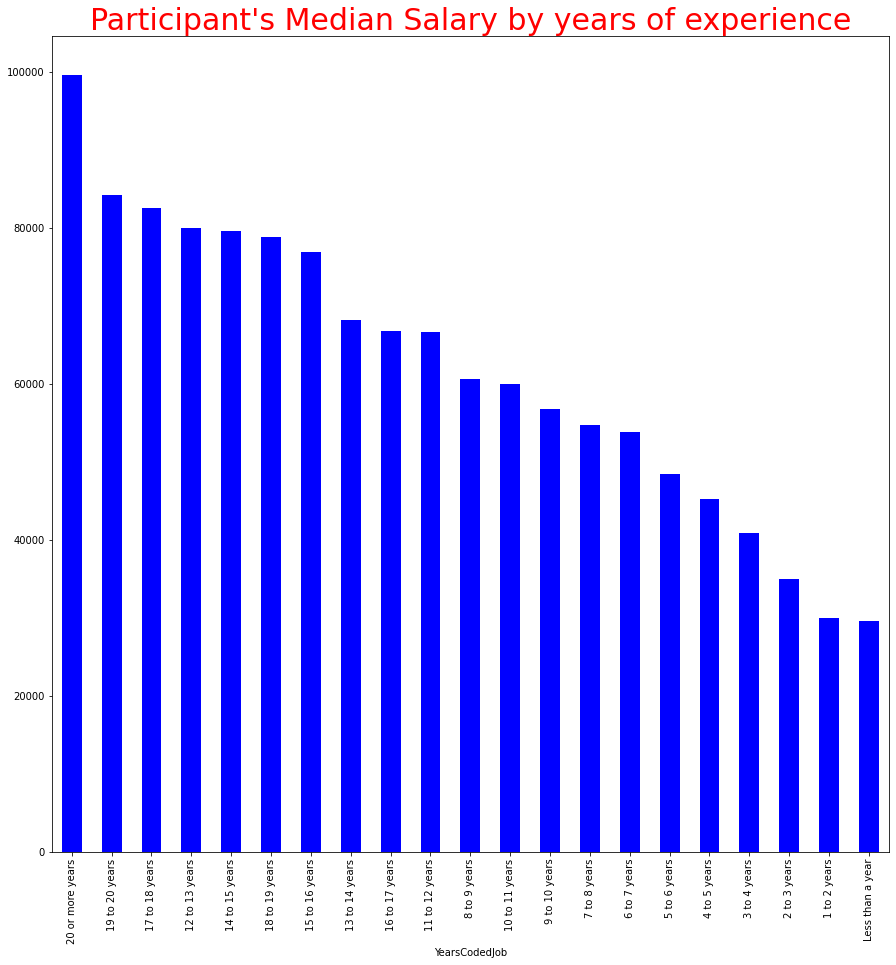

<AxesSubplot:title={'center':"Participant's Median Salary by years of experience"}, xlabel='YearsCodedJob'>

In [0]:
# Reove any row where 'Salary', 'YearsCodedJob', 'YearsProgram' are null values (NaN)
no_null_sal_years = survey_df.dropna(subset=['Salary', 'YearsCodedJob']).copy()
#value_counts_year_prg = no_null_sal["YearsProgram"].value_counts()
#value_counts_year_prg

value_counts_year_codes = no_null_sal_years["YearsCodedJob"].value_counts()
value_counts_year_codes
# Plot the median Salary of top 50 countries having more 100 survey participant 
year_df = no_null_sal_years.groupby('YearsCodedJob')['Salary'].median().sort_values(ascending = False)
year_df.head(20)

plot_bar_graph(year_df, 'YearsCodedJob', 'Salary', "Participant's Median Salary by years of experience", 15, 15, 30, 'red', 'blue', vert=False, rot=90)

## From the above plot, we can see that the increase of median Salary is proportional to the numer of years coding in their current jobs
| YearsCodedJob     |   Median Salary   |
|:------------------|:-----------------:|
| 1 to 2 years      |   30000.00        |
| 2 to 3 years      |   35000.00        |
| 3 to 4 years      |   40762.00        |
| 4 to 5 years      |   45161.30        |
| 5 to 6 years      |   48387.01        |
| 6 to 7 years      |   53750.00        |
| 7 to 8 years      |   54692.08        |
| 8 to 9 years      |   60606.06        |
| 9 to 10 years     |   56734.10        |

## Question 5: What are the median salaries of three gender groups (Male, Female and others) for different years of coding on the current job

Out[472]:

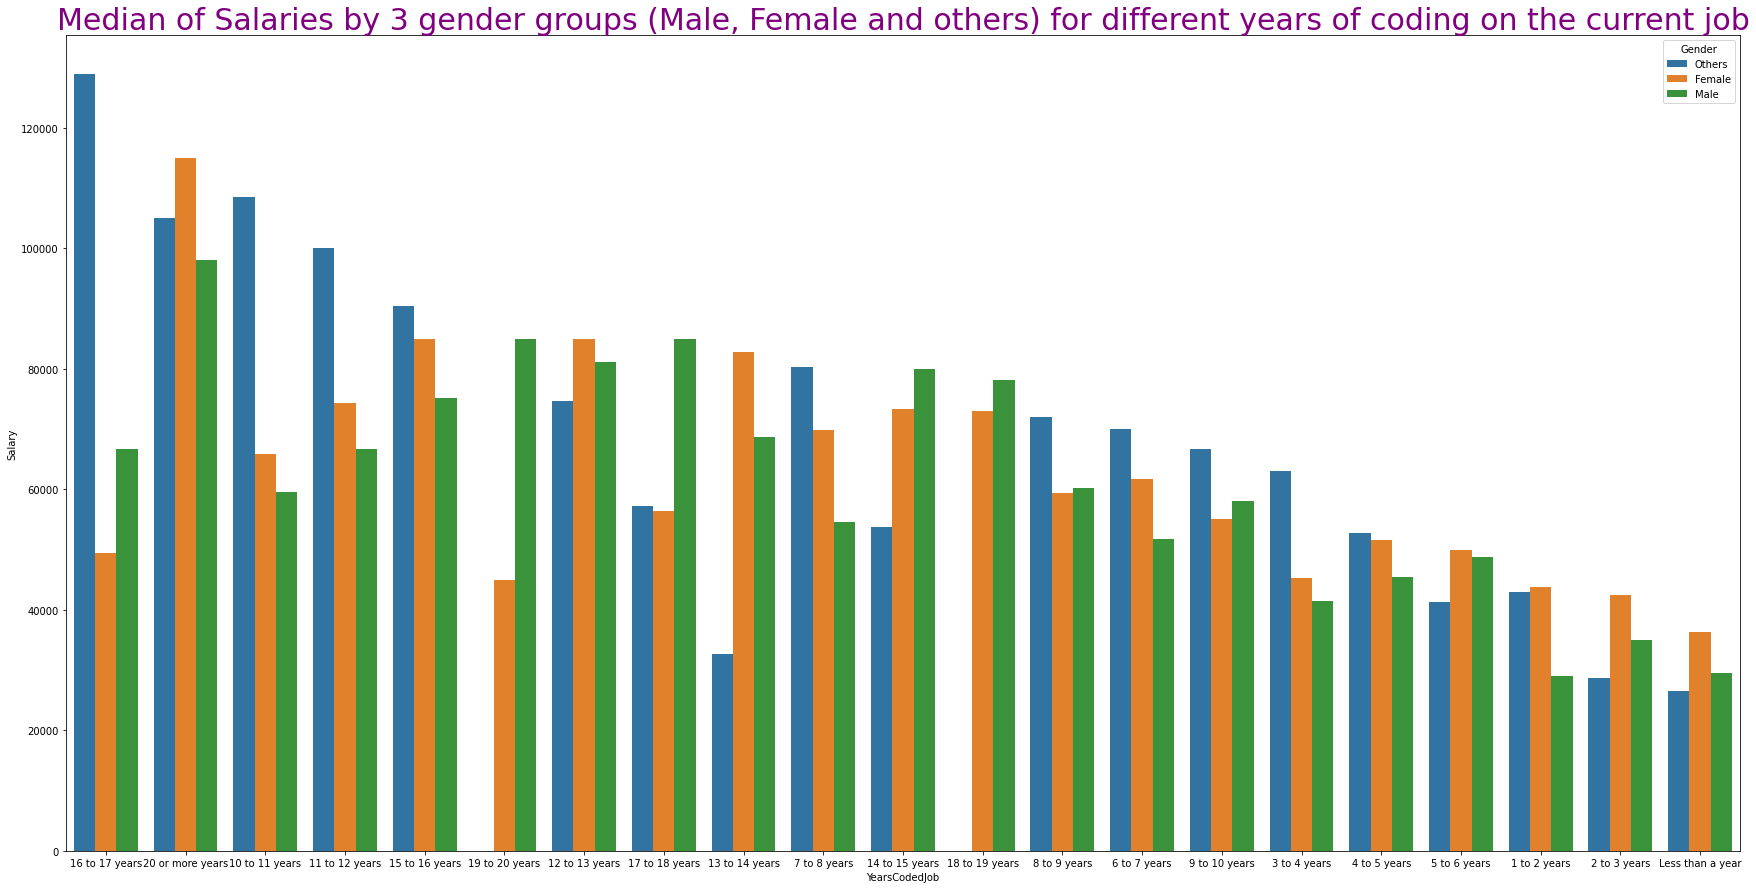

Text(0.5, 1.0, 'Median of Salaries by 3 gender groups (Male, Female and others) for different years of coding on the current job')

In [0]:
# Plot the median salary of three gender groups (Male, Female and others) for different years of coding on the current job
#
# Consolidate into 3 gender groups (Male, Female and others)
no_null_gender_year = no_null_sal_years.dropna(subset=['Gender'])
gender_year_df = regroup_gender_values(no_null_gender_year, "Gender")

#gender_year_value_counts = gender_year_df["Gender"].value_counts()
#gender_year_value_counts

# Plot the median salary of three gender groups (Male, Female and others)
salary_year_gender_plot = gender_year_df.groupby(['YearsCodedJob','Gender'])['Salary'].median().sort_values(ascending = False).reset_index()
salary_year_gender_plot.head(60)
salary_year_gender_plot.tail(30)
plt.figure(figsize=(30, 15))
sns.barplot(x = 'YearsCodedJob', y = 'Salary', hue = 'Gender', data = salary_year_gender_plot)
plt.title('Median of Salaries by 3 gender groups (Male, Female and others) for different years of coding on the current job', fontsize=30, color='purple')

## Question 6: What are the most favorite programming languages that the developers in this survey want to work on

Out[473]:

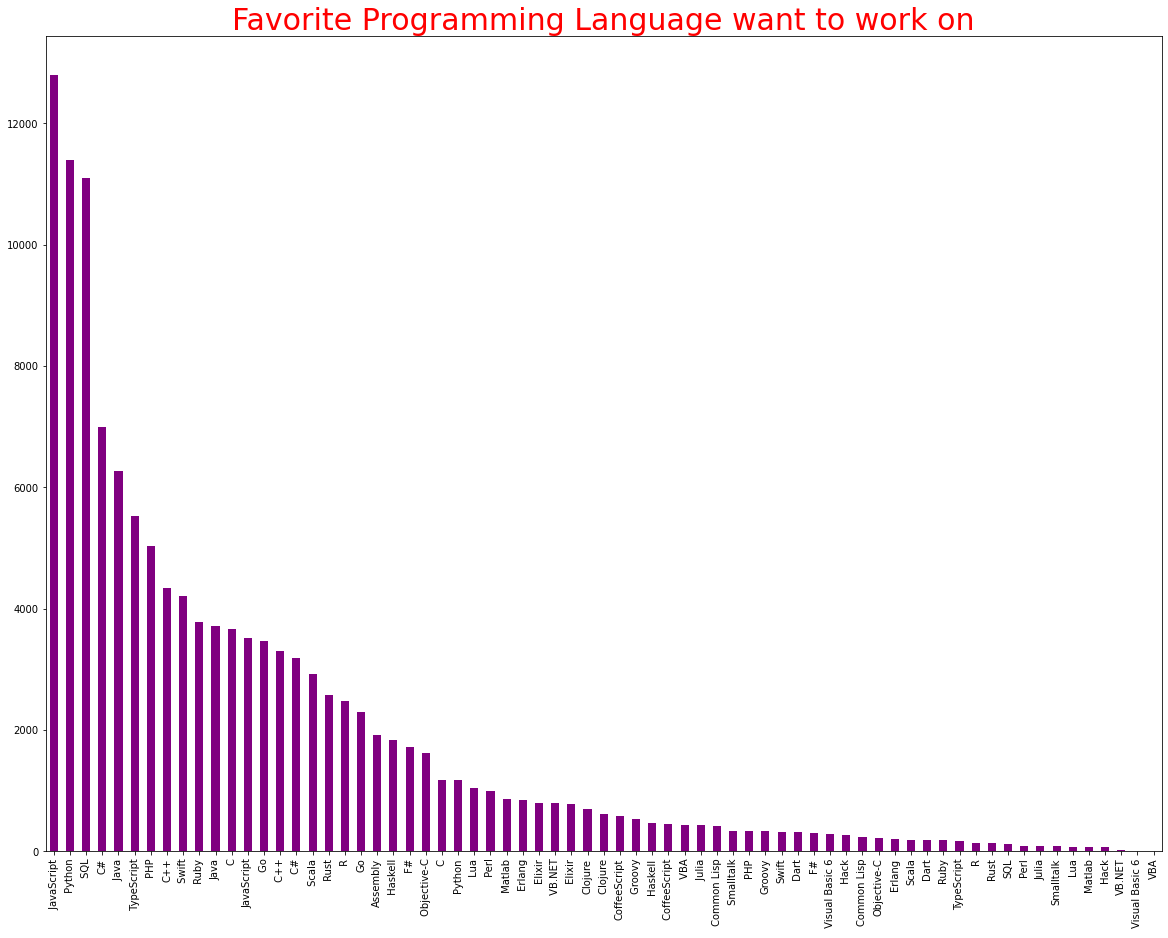

<AxesSubplot:title={'center':'Favorite Programming Language want to work on'}>

In [0]:
# Split the "WantWorkLanguage" column which having multiple programming language entries separating ";" into each own language entry
split_df = split_strings_in_column(survey_df, 'WantWorkLanguage', delimiter=';')
wanted_lang = split_df.value_counts()
#wanted_lang.head(10)

plot_bar_graph(wanted_lang, 'index', 'value', "Favorite Programming Language want to work on", 20, 15, 30, 'red', 'purple', vert=False, rot=90)

## From the above graph, it shows JavaScript, Python and SQL are the three most popular languages that developers participating this survey want to work on
| Programming Language  |   Count    |
|:------------------    |:----------:|
| JavaScript            |   12804    |
| Python                |   11392    |
| SQL                   |   11094    |
| C#                    |   6994     |
| Java                  |   6273     |
| TypeScript            |   5530     |
| PHP                   |   5026     |
| C++                   |   4337     |
| Swift                 |   4204     |
| Ruby                  |   3784     |